In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Load the dataset
df = pd.read_csv('titanic_dataset.csv')

In [40]:
# Drop irrelevant columns
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

In [41]:
# Handle missing values (you may need more sophisticated methods)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [42]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [43]:
# Split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [44]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

In [46]:
# Build the neural network model
model = Sequential()
model.add(Dense(28, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.1, verbose=2)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Epoch 1/100
6/6 - 0s - loss: 0.7285 - accuracy: 0.5018 - val_loss: 0.7630 - val_accuracy: 0.5079 - 193ms/epoch - 32ms/step
Epoch 2/100
6/6 - 0s - loss: 0.7018 - accuracy: 0.6232 - val_loss: 0.7383 - val_accuracy: 0.5397 - 14ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 0.6806 - accuracy: 0.6554 - val_loss: 0.7145 - val_accuracy: 0.5873 - 13ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.6595 - accuracy: 0.6714 - val_loss: 0.6935 - val_accuracy: 0.6032 - 15ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6409 - accuracy: 0.6875 - val_loss: 0.6744 - val_accuracy: 0.6349 - 13ms/epoch - 2ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6238 - accuracy: 0.7125 - val_loss: 0.6568 - val_accuracy: 0.6508 - 15ms/epoch - 2ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6077 - accuracy: 0.7196 - val_loss: 0.6399 - val_accuracy: 0.6349 - 14ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5920 - accuracy: 0.7232 - val_loss: 0.6240 - val_accuracy: 0.6349 - 14ms/epoch - 2ms/step
Epoch 9/100
6/6 - 0s - loss: 0

Epoch 69/100
6/6 - 0s - loss: 0.3809 - accuracy: 0.8482 - val_loss: 0.3962 - val_accuracy: 0.8413 - 13ms/epoch - 2ms/step
Epoch 70/100
6/6 - 0s - loss: 0.3805 - accuracy: 0.8482 - val_loss: 0.3952 - val_accuracy: 0.8413 - 12ms/epoch - 2ms/step
Epoch 71/100
6/6 - 0s - loss: 0.3802 - accuracy: 0.8482 - val_loss: 0.3962 - val_accuracy: 0.8413 - 13ms/epoch - 2ms/step
Epoch 72/100
6/6 - 0s - loss: 0.3800 - accuracy: 0.8464 - val_loss: 0.3974 - val_accuracy: 0.8413 - 14ms/epoch - 2ms/step
Epoch 73/100
6/6 - 0s - loss: 0.3793 - accuracy: 0.8518 - val_loss: 0.3976 - val_accuracy: 0.8413 - 14ms/epoch - 2ms/step
Epoch 74/100
6/6 - 0s - loss: 0.3789 - accuracy: 0.8482 - val_loss: 0.3980 - val_accuracy: 0.8413 - 14ms/epoch - 2ms/step
Epoch 75/100
6/6 - 0s - loss: 0.3791 - accuracy: 0.8446 - val_loss: 0.3971 - val_accuracy: 0.8413 - 13ms/epoch - 2ms/step
Epoch 76/100
6/6 - 0s - loss: 0.3781 - accuracy: 0.8464 - val_loss: 0.3999 - val_accuracy: 0.8413 - 13ms/epoch - 2ms/step
Epoch 77/100
6/6 - 0s - 

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[148  11]
 [ 36  73]]


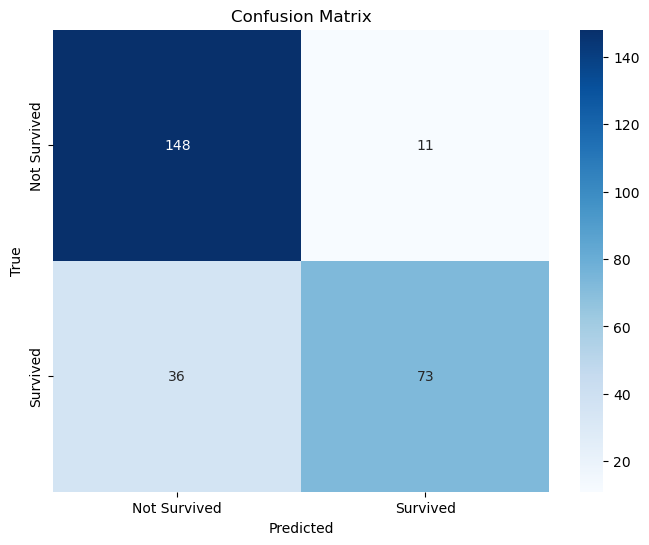

In [49]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

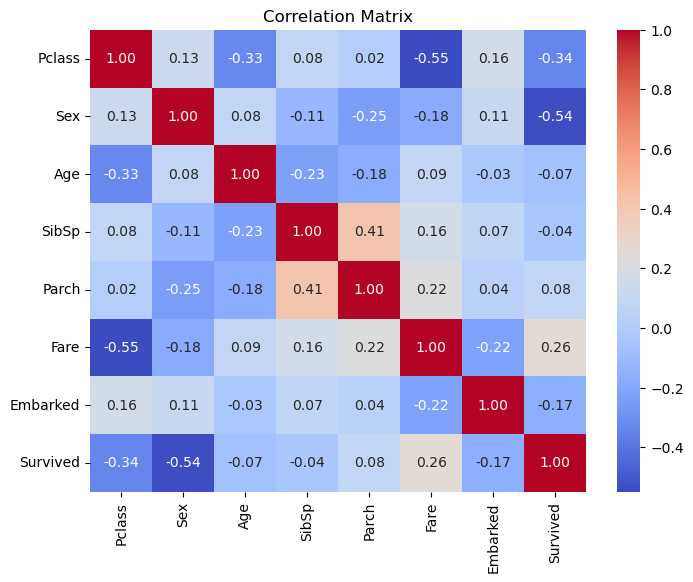

In [50]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Epoch 1/60
8/8 [==============================] - 0s 9ms/step - loss: 0.7450 - accuracy: 0.4799 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 2/60
8/8 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.5241 - val_loss: 0.6947 - val_accuracy: 0.5981
Epoch 3/60
8/8 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5341 - val_loss: 0.6909 - val_accuracy: 0.6402
Epoch 4/60
8/8 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5582 - val_loss: 0.6883 - val_accuracy: 0.6308
Epoch 5/60
8/8 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5361 - val_loss: 0.6864 - val_accuracy: 0.6449
Epoch 6/60
8/8 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5703 - val_loss: 0.6855 - val_accuracy: 0.6355
Epoch 7/60
8/8 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5984 - val_loss: 0.6846 - val_accuracy: 0.6402
Epoch 8/60
8/8 [==================

6/6 [==============================] - 0s 651us/step
Accuracy: 0.8212290502793296
Confusion Matrix:
[[93 12]
 [20 54]]


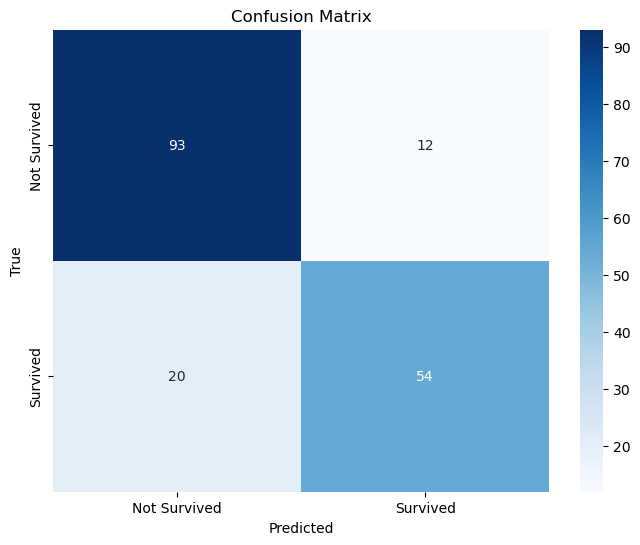

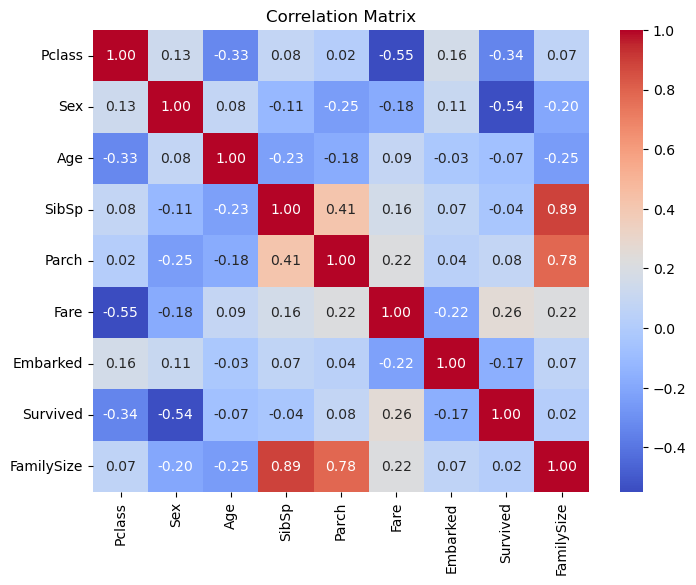

In [37]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('titanic_dataset.csv')

# Drop irrelevant columns
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Handle missing values (you may need more sophisticated methods)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
# Example of creating a new feature based on family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.3, verbose=1, shuffle=True)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
